# Proceso ETL del csv - Vacas
---

## Primera fase: Exploración del dataset y limpieza

### Importación de librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Carga del dataset
---

In [ ]:
# Ruta al archivo CSV en Google Drive
csv_path = '/content/drive/MyDrive/Inteligencia Artificial Avanzada /DataSets/1204.csv'

# Cargar el archivo CSV en un DataFrame de pandas, usando la fila 1 (índice 0) como encabezado
try:
    df = pd.read_csv(csv_path, header=1)
    print("Archivo CSV cargado exitosamente.")
    # Muestra las primeras filas del DataFrame
    display(df.head())
except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta especificada: {csv_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Archivo CSV cargado exitosamente.


,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,RCS (* 1000 células / ml),Patada,Incompleto,Pezones no encontrados,Ubre,...,Destino Leche,Razón de la desviación,DI.3,DD.3,TI.3,TD.3,DI.4,DD.4,TI.4,TD.4
0,01/03/2025 05:37 a. m.,Ordeño,09:58,23.96,1.0,NaN,NaN,NaN,NaN,1.0,...,Tanque,NaN,1.74,2.16,2.40,2.10,6.11,5.56,3.33,8.96
1,01/03/2025 07:15 p. m.,Ordeño,06:51,17.20,2.0,NaN,DI,NaN,NaN,1.0,...,Tanque,NaN,2.10,2.34,2.52,2.28,3.23,4.86,2.69,6.42
2,02/03/2025 02:24 a. m.,Ordeño,07:23,11.13,1.0,NaN,NaN,NaN,NaN,1.0,...,Tanque,NaN,1.68,1.98,2.34,1.92,4.40,2.43,1.15,3.15
3,02/03/2025 07:51 p. m.,Ordeño,08:29,20.64,2.0,NaN,NaN,NaN,NaN,1.0,...,Tanque,NaN,2.10,2.22,2.52,2.40,5.72,4.88,3.10,6.94
4,03/03/2025 06:00 a. m.,Ordeño,05:05,9.59,1.0,NaN,NaN,NaN,NaN,1.0,...,Tanque,NaN,1.80,2.10,2.28,1.98,2.69,2.41,1.44,3.05


In [ ]:
# Display the dimensions of the original DataFrame
print("Dimensiones del dataset original:")
print(df.shape)

Dimensiones del dataset original:
(259, 35)


### Checado de registros duplicados (por ID)

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

print(f"\nNúmero de registros duplicados en el dataset: {num_duplicate_rows}")

# Display the duplicate rows (optional)
if num_duplicate_rows > 0:
    print("\nRegistros duplicados:")
    display(df[duplicate_rows])


Número de registros duplicados en el dataset: 0


### Cuento de registros nulos en el dataset sin limpiar
---

In [ ]:
# Count the number of null values in each column of the original DataFrame
null_counts_original = df.isnull().sum()

# Print the null counts
print("Número de registros nulos por columna en el dataset original:")
print(null_counts_original)

Número de registros nulos por columna en el dataset original:
Hora de inicio                 0
Acción                         0
Duración (mm:ss)               0
Producción (kg)                7
Número de ordeño               7
RCS (* 1000 células / ml)    259
Patada                       242
Incompleto                   231
Pezones no encontrados       241
Ubre                           7
Pezón                        236
DI                             7
DD                             7
TI                             7
TD                             7
DI.1                           7
DD.1                           7
TI.1                           7
TD.1                           7
DI.2                           7
DD.2                           7
TI.2                           7
TD.2                           7
EO/PO                          0
Usuario                      259
Destino Leche                  7
Razón de la desviación       259
DI.3                           7
DD.3          

### Eliminación de columnas con más del 50% de sus datos nulos

In [ ]:
# Identify columns with missing values and calculate percentages
missing_percentages = df.isnull().sum() / len(df) * 100

# Determine a threshold (e.g., drop columns with more than 50% missing values)
threshold = 50

# Get the list of columns to drop
columns_to_drop = missing_percentages[missing_percentages > threshold].index.tolist()

# Drop columns
df_dropped = df.drop(columns=columns_to_drop)

# Display remaining columns (header)
print("Columnas restantes después de dropear:")
print(df_dropped.columns.tolist())

# Display the DataFrame after dropping columns
display(df_dropped.head())

# Cantidad de instancias en el dataset despues de limpiarse
df_dropped.shape


Columnas restantes después de dropear:
['Hora de inicio', 'Acción', 'Duración (mm:ss)', 'Producción (kg)', 'Número de ordeño', 'Ubre', 'DI', 'DD', 'TI', 'TD', 'DI.1', 'DD.1', 'TI.1', 'TD.1', 'DI.2', 'DD.2', 'TI.2', 'TD.2', 'EO/PO', 'Destino Leche', 'DI.3', 'DD.3', 'TI.3', 'TD.3', 'DI.4', 'DD.4', 'TI.4', 'TD.4']


,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,Ubre,DI,DD,TI,TD,...,EO/PO,Destino Leche,DI.3,DD.3,TI.3,TD.3,DI.4,DD.4,TI.4,TD.4
0,01/03/2025 05:37 a. m.,Ordeño,09:58,23.96,1.0,1.0,1.26,1.74,1.86,1.62,...,VMS 3,Tanque,1.74,2.16,2.40,2.10,6.11,5.56,3.33,8.96
1,01/03/2025 07:15 p. m.,Ordeño,06:51,17.20,2.0,1.0,1.14,1.80,2.04,1.74,...,VMS 3,Tanque,2.10,2.34,2.52,2.28,3.23,4.86,2.69,6.42
2,02/03/2025 02:24 a. m.,Ordeño,07:23,11.13,1.0,1.0,1.20,1.44,1.74,1.44,...,VMS 3,Tanque,1.68,1.98,2.34,1.92,4.40,2.43,1.15,3.15
3,02/03/2025 07:51 p. m.,Ordeño,08:29,20.64,2.0,1.0,1.20,1.68,1.92,1.68,...,VMS 3,Tanque,2.10,2.22,2.52,2.40,5.72,4.88,3.10,6.94
4,03/03/2025 06:00 a. m.,Ordeño,05:05,9.59,1.0,1.0,1.14,1.62,1.80,1.50,...,VMS 3,Tanque,1.80,2.10,2.28,1.98,2.69,2.41,1.44,3.05


(259, 28)

### Tipo de dato de cada columna

In [ ]:
# Check the data types of each column
print("Tipo de dato de cada columna:")
print(df_dropped.dtypes)

Tipo de dato de cada columna:
Hora de inicio       object
Acción               object
Duración (mm:ss)     object
Producción (kg)     float64
Número de ordeño    float64
Ubre                float64
DI                  float64
DD                  float64
TI                  float64
TD                  float64
DI.1                float64
DD.1                float64
TI.1                float64
TD.1                float64
DI.2                float64
DD.2                float64
TI.2                float64
TD.2                float64
EO/PO                object
Destino Leche        object
DI.3                float64
DD.3                float64
TI.3                float64
TD.3                float64
DI.4                float64
DD.4                float64
TI.4                float64
TD.4                float64
dtype: object


### Numero de datos nulos por columna despues de eliminar las columnas que no nos sirven
---
Esto nos sirve para comparar el total de registros con el numero de registros que faltan

In [ ]:
# Count the number of null values in each column
null_counts = df_dropped.isnull().sum()

# Print the null counts
print("Número de registros nulos por columna:")
print(null_counts)
df_dropped.shape

Número de registros nulos por columna:
Hora de inicio      0
Acción              0
Duración (mm:ss)    0
Producción (kg)     7
Número de ordeño    7
Ubre                7
DI                  7
DD                  7
TI                  7
TD                  7
DI.1                7
DD.1                7
TI.1                7
TD.1                7
DI.2                7
DD.2                7
TI.2                7
TD.2                7
EO/PO               0
Destino Leche       7
DI.3                7
DD.3                7
TI.3                7
TD.3                7
DI.4                7
DD.4                7
TI.4                7
TD.4                7
dtype: int64


(259, 28)

### Eliminamos columnas que todos sus valores sean 0. Creamos un nuevo dataframe
---

In [ ]:
# List of columns to drop
columns_to_drop_explicit = ['DI.1', 'DD.1', 'TI.1', 'TD.1']

# Drop the specified columns from the original DataFrame to create a new one
df_cleaned = df_dropped.drop(columns=columns_to_drop_explicit)

# Display the head of the new DataFrame
print("Columnas restantes después de dropear explícitamente:")
print(df_cleaned.columns.tolist())
display(df_cleaned.head())

Columnas restantes después de dropear explícitamente:
['Hora de inicio', 'Acción', 'Duración (mm:ss)', 'Producción (kg)', 'Número de ordeño', 'Ubre', 'DI', 'DD', 'TI', 'TD', 'DI.2', 'DD.2', 'TI.2', 'TD.2', 'EO/PO', 'Destino Leche', 'DI.3', 'DD.3', 'TI.3', 'TD.3', 'DI.4', 'DD.4', 'TI.4', 'TD.4']


,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,Ubre,DI,DD,TI,TD,...,EO/PO,Destino Leche,DI.3,DD.3,TI.3,TD.3,DI.4,DD.4,TI.4,TD.4
0,01/03/2025 05:37 a. m.,Ordeño,09:58,23.96,1.0,1.0,1.26,1.74,1.86,1.62,...,VMS 3,Tanque,1.74,2.16,2.40,2.10,6.11,5.56,3.33,8.96
1,01/03/2025 07:15 p. m.,Ordeño,06:51,17.20,2.0,1.0,1.14,1.80,2.04,1.74,...,VMS 3,Tanque,2.10,2.34,2.52,2.28,3.23,4.86,2.69,6.42
2,02/03/2025 02:24 a. m.,Ordeño,07:23,11.13,1.0,1.0,1.20,1.44,1.74,1.44,...,VMS 3,Tanque,1.68,1.98,2.34,1.92,4.40,2.43,1.15,3.15
3,02/03/2025 07:51 p. m.,Ordeño,08:29,20.64,2.0,1.0,1.20,1.68,1.92,1.68,...,VMS 3,Tanque,2.10,2.22,2.52,2.40,5.72,4.88,3.10,6.94
4,03/03/2025 06:00 a. m.,Ordeño,05:05,9.59,1.0,1.0,1.14,1.62,1.80,1.50,...,VMS 3,Tanque,1.80,2.10,2.28,1.98,2.69,2.41,1.44,3.05


### Histograma de todas las columnas

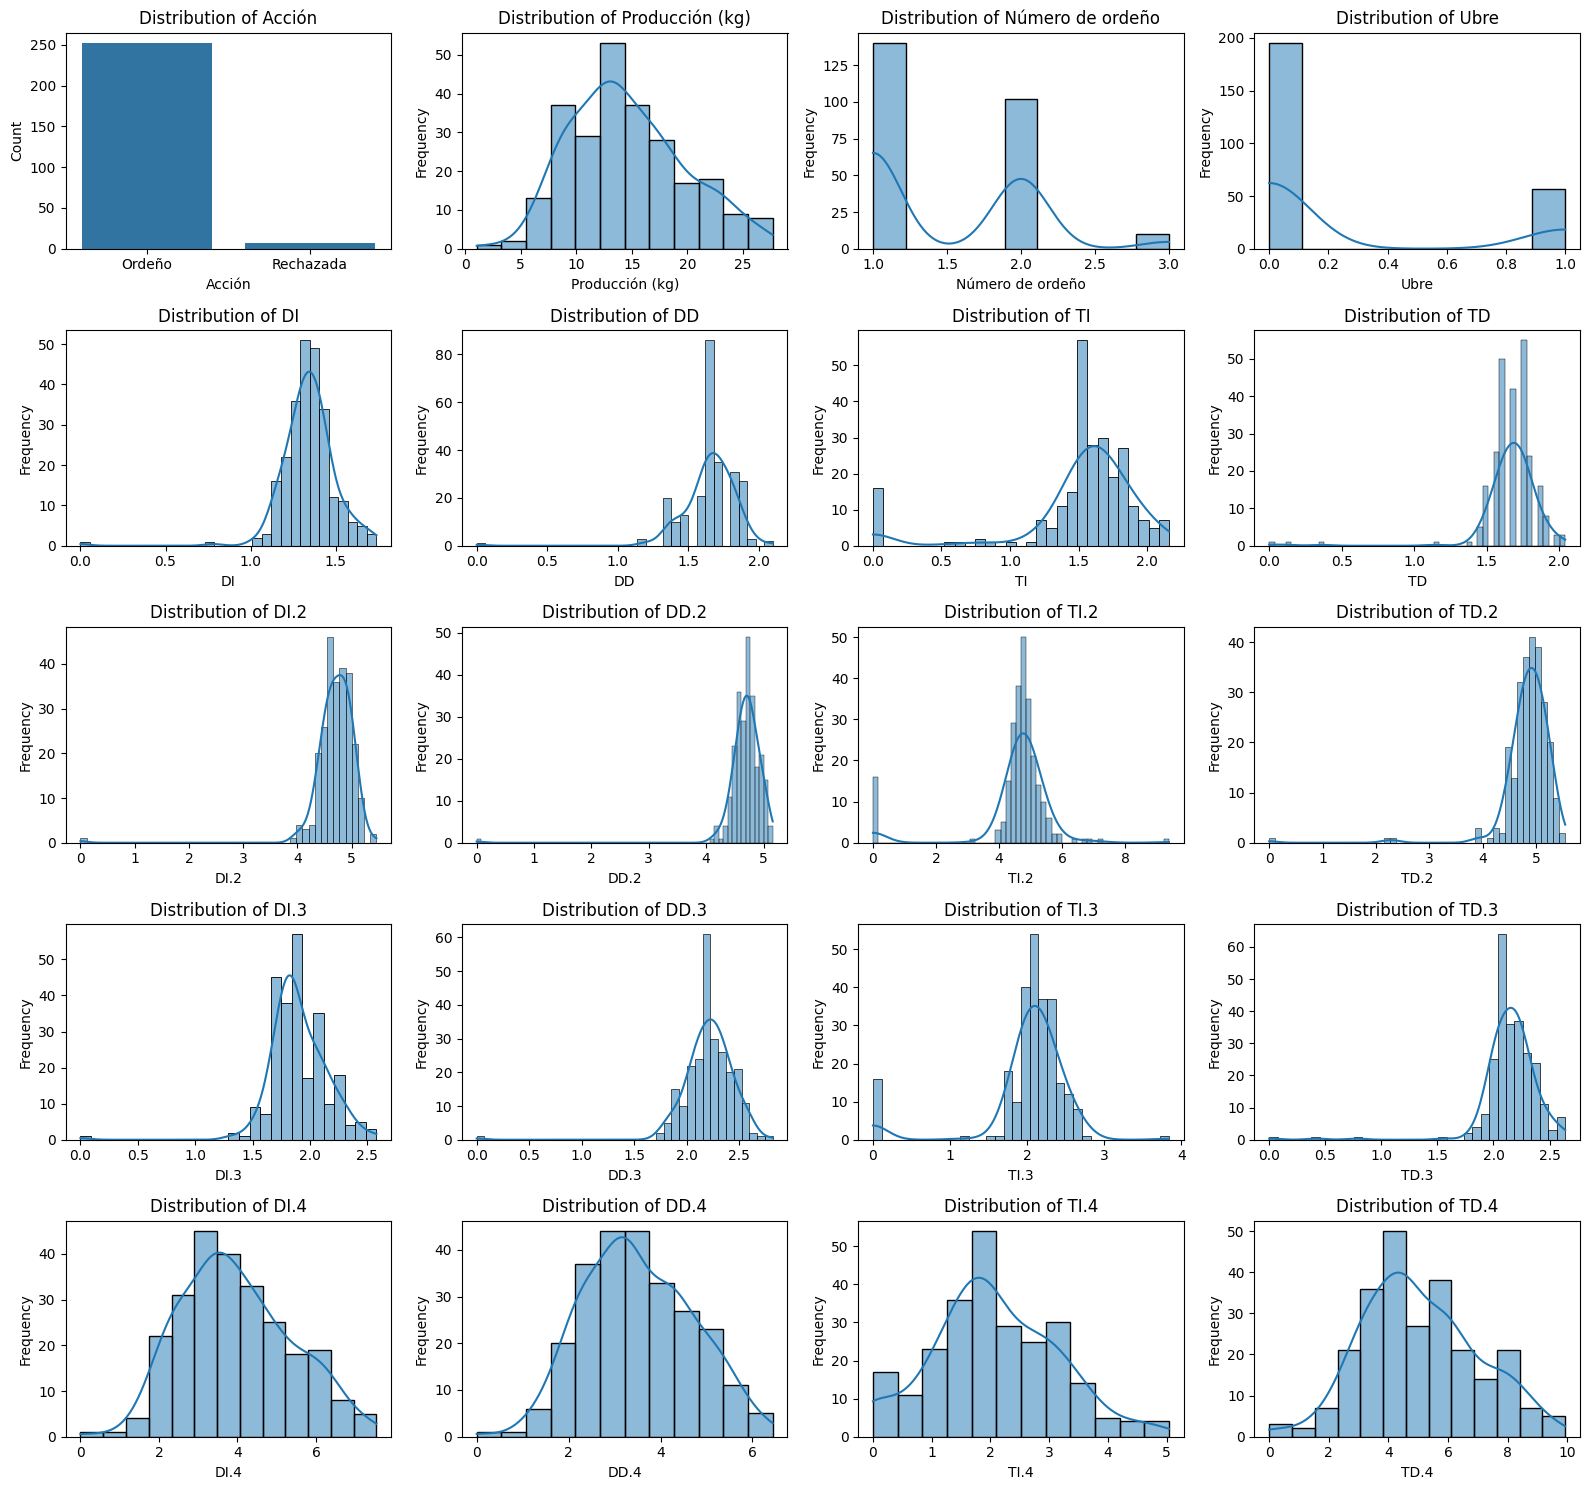

In [ ]:
# Get the list of columns from df_cleaned
columns_to_visualize = df_cleaned.columns.tolist()

# Exclude date-related columns and identifier columns
columns_to_exclude = ['Hora de inicio', 'Accion', 'Duración (mm:ss)', 'EO/PO', 'Destino Leche']
columns_to_visualize = [col for col in columns_to_visualize if col not in columns_to_exclude]

# Calculate the number of rows and columns for subplots
n_cols = 4  # You can adjust the number of columns as needed
n_rows = (len(columns_to_visualize) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(columns_to_visualize):
    if i < len(axes): # Ensure we don't go out of bounds if there are more columns than subplots
        if df_cleaned[col].dtype in ['int64', 'float64']:
            # For numerical columns, use a histogram
            sns.histplot(df_cleaned[col].dropna(), kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
        else:
            # For other types (likely discrete/categorical), use a bar plot
            sns.countplot(x=col, data=df_cleaned, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Segunda Fase: Exploración del dataset Limpiado
---


##

### Mapa de calor con valores faltantes en cada columna

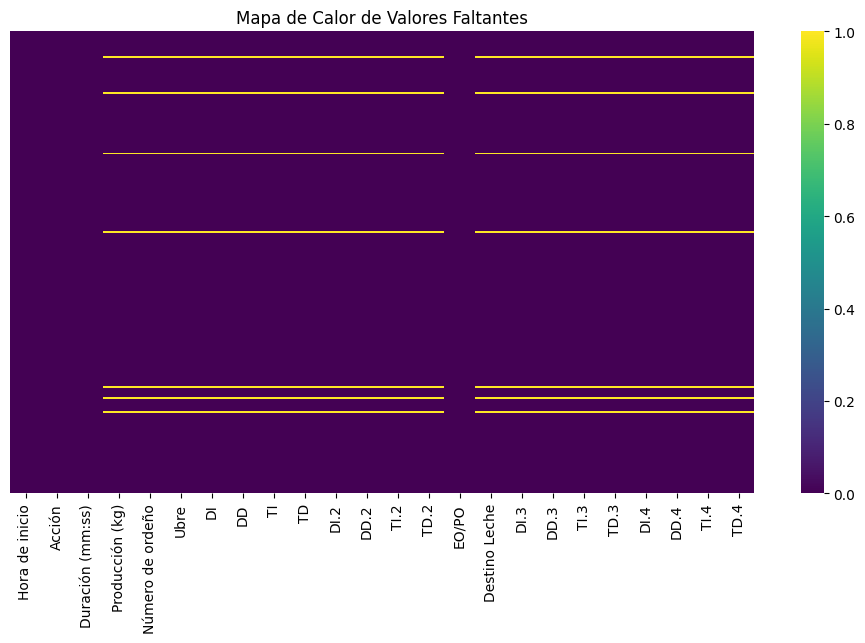

Porcentaje de missing por columna%:
Producción (kg)     2.702703
DI                  2.702703
Ubre                2.702703
Número de ordeño    2.702703
DD                  2.702703
DI.2                2.702703
TD                  2.702703
TI                  2.702703
DI.4                2.702703
DD.3                2.702703
TI.3                2.702703
DD.2                2.702703
TI.2                2.702703
TD.2                2.702703
Destino Leche       2.702703
DI.3                2.702703
TI.4                2.702703
DD.4                2.702703
TD.4                2.702703
TD.3                2.702703
dtype: float64


In [ ]:
# Mapa de calor de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()

# Porcentaje de missing por columna
missing_summary = (df_cleaned.isnull().sum() / len(df_cleaned) * 100).sort_values(ascending=False)
print("Porcentaje de missing por columna%:")
print(missing_summary[missing_summary > 0])

### Estadistica descriptiva básica
---

In [ ]:
# Resumen estadístico completo
print("Estadísticas descriptivas:")
display(df_cleaned.describe(include='all'))

# Para variables categóricas específicas
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nFrecuencias de {col}:")
    print(df_cleaned[col].value_counts())

Estadísticas descriptivas:


,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,Ubre,DI,DD,TI,TD,...,EO/PO,Destino Leche,DI.3,DD.3,TI.3,TD.3,DI.4,DD.4,TI.4,TD.4
count,259,259,259,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,259,252,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
unique,259,2,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,18/07/2025 12:46 a. m.,Ordeño,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,VMS 3,Tanque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,252,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,259,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,14.596468,1.484127,0.226190,1.343095,1.654762,1.520476,1.670000,...,NaN,NaN,1.902381,2.214762,2.008571,2.150476,3.969167,3.510833,2.066151,5.050317
std,NaN,NaN,NaN,5.095726,0.574825,0.419196,0.162436,0.189866,0.461516,0.208225,...,NaN,NaN,0.250648,0.241492,0.582791,0.257462,1.404536,1.182839,1.070263,1.926322
min,NaN,NaN,NaN,1.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,10.847500,1.000000,0.000000,1.260000,1.560000,1.500000,1.620000,...,NaN,NaN,1.740000,2.100000,1.920000,2.040000,3.000000,2.630000,1.402500,3.692500
50%,NaN,NaN,NaN,13.885000,1.000000,0.000000,1.320000,1.680000,1.620000,1.680000,...,NaN,NaN,1.860000,2.220000,2.100000,2.160000,3.790000,3.375000,1.940000,4.740000
75%,NaN,NaN,NaN,17.902500,2.000000,0.000000,1.440000,1.755000,1.740000,1.740000,...,NaN,NaN,2.040000,2.340000,2.280000,2.280000,4.890000,4.335000,2.797500,6.210000



Frecuencias de Hora de inicio:
Hora de inicio
18/07/2025 12:46 a. m.    1
01/03/2025 05:37 a. m.    1
01/03/2025 07:15 p. m.    1
09/07/2025 10:51 p. m.    1
09/07/2025 03:18 p. m.    1
                         ..
05/03/2025 01:47 p. m.    1
04/03/2025 06:27 p. m.    1
04/03/2025 12:16 a. m.    1
03/03/2025 06:00 a. m.    1
02/03/2025 07:51 p. m.    1
Name: count, Length: 259, dtype: int64

Frecuencias de Acción:
Acción
Ordeño       252
Rechazada      7
Name: count, dtype: int64

Frecuencias de Duración (mm:ss):
Duración (mm:ss)
00:00    7
08:08    5
08:04    4
07:21    4
07:14    4
        ..
05:19    1
10:43    1
06:33    1
05:36    1
05:40    1
Name: count, Length: 177, dtype: int64

Frecuencias de EO/PO:
EO/PO
VMS 3    259
Name: count, dtype: int64

Frecuencias de Destino Leche:
Destino Leche
Tanque    252
Name: count, dtype: int64


### Mapa de correlaciones
---

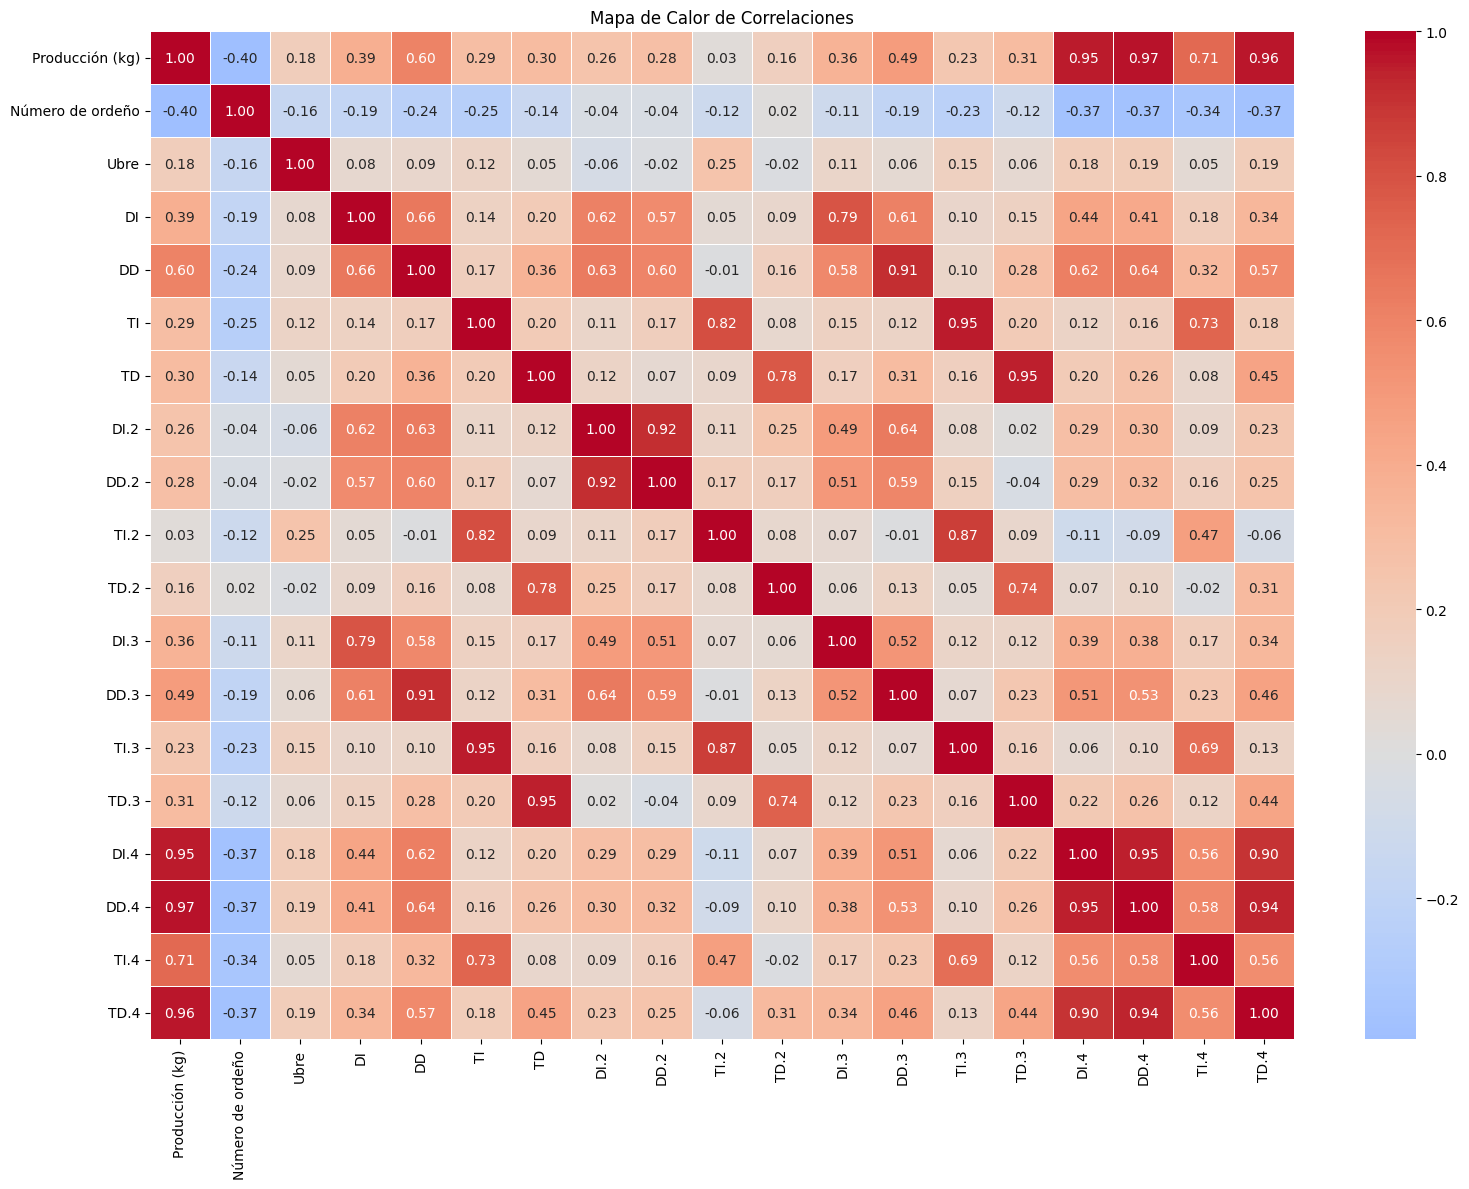

Top 10 correlaciones positivas:
DD.4             Producción (kg)    0.969174
Producción (kg)  DD.4               0.969174
TD.4             Producción (kg)    0.960312
Producción (kg)  TD.4               0.960312
TI.3             TI                 0.954088
TI               TI.3               0.954088
Producción (kg)  DI.4               0.951869
DI.4             Producción (kg)    0.951869
TD.3             TD                 0.947434
TD               TD.3               0.947434
dtype: float64

Top 10 correlaciones negativas:
Número de ordeño  TI.4               -0.337591
TI.4              Número de ordeño   -0.337591
DD.4              Número de ordeño   -0.365060
Número de ordeño  DD.4               -0.365060
                  TD.4               -0.366020
TD.4              Número de ordeño   -0.366020
Número de ordeño  DI.4               -0.366785
DI.4              Número de ordeño   -0.366785
Número de ordeño  Producción (kg)    -0.395106
Producción (kg)   Número de ordeño   -0.395106


In [ ]:
# Mapa de calor de correlaciones (solo variables numéricas)
plt.figure(figsize=(16, 12))
correlation_matrix = df_cleaned.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.tight_layout()
plt.show()

# Top correlaciones (positivas y negativas)
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
print("Top 10 correlaciones positivas:")
print(corr_pairs[corr_pairs < 1].head(10))
print("\nTop 10 correlaciones negativas:")
print(corr_pairs.tail(10))